# Star formation rates in galaxies

The star formation rate (SFR) of a galaxy is the amount of stars formed per year in that galaxy, given in solar masses per year. The specific star formation rate (sSFR) of a galaxy is the SFR divided by the stellar mass of the galaxy. It is directly related to the amount and density of cold (atomic and molecular) gas in a galaxy, but is also subject to many other influences [Kennicutt 1989](http://articles.adsabs.harvard.edu/pdf/1989ApJ...344..685K). In general, early-type galaxies are found to contain less cold gass, and when it is present it is less dense than in late-type galaxies. Star formation rate is therefore a good indicator of whether a galaxy is of early or late type morphology. 

As galaxies form a continuum on the Hubble sequence, some kind of treshold must be established for where to do the "cut" with regards to SFR. In this project, the method employed in [Genel et al., 2017](https://arxiv.org/pdf/1707.05327.pdf) who also used the IllustrisTNG data, has been used. The galaxies are divided into the categories "main sequence" and "quenched", corresponding to whether or not they have a lot of star formation going on. Early type galaxies are ususally quenched, while late type galaxies are found on the main sequence. Main sequence galaxies are defined as having a SSFR of 
$$log(sSFR[Gyr^{-1}]) = -0.94 \pm 0.5, $$
which is the mean value of the sSFR of galaxies in the range $M_{\odot}=10^{9}$ to $M_{\odot}=10^{10.5}$.

NBBB I DON'T GET THIS RESULT.

Quenched galaxies are defines as those being an order of magnitude below this treshold value. Using these criteria on our set of central galaxies, we get this figure.


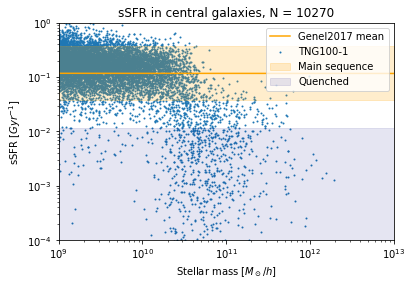

In [4]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataPath = "../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_SFR.csv"
df = pd.read_csv(dataPath)

df["SubhaloMassStellar"] *=10**10 #Changing mass to solar masses
df["SubhaloSFR"] *=10**(9) #Changing the SFR from /yr to /Gyr.
df["SubhalosSFR"]  = df["SubhaloSFR"]/df["SubhaloMassStellar"] #Adding specific star formation rate

ax = df.plot.scatter(x="SubhaloMassStellar", y="SubhalosSFR", s=1, label = "TNG100-1")
x = [10**9, 10**13]
y = [10**(-0.93), 10**(-0.933)] #From Genel 2017
ax.plot(x,y, label = "Genel2017 mean", color='orange')
ax.fill_between(x, 10**(-1.43), 10**(-0.43), color="orange", alpha=0.2, label = "Main sequence")
ax.fill_between(x, 10**(-1.933), 0, color="navy", alpha=0.1, label = "Quenched")
il.formatplot.SM_SFR(title="sSFR in central galaxies", df=df)
plt.show()